<a href="https://colab.research.google.com/github/thecoderarnav/C113/blob/main/C113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
data_to_load = files.upload()



Saving data2.csv to data2.csv


In [2]:
import pandas as pd
import statistics
import plotly.express as px

df = pd.read_csv("data2.csv")
fig = px.scatter(df,y = "quant_saved", color = "rem_any")
fig.show()

In [3]:
import csv
with open("data2.csv", newline = "")as f:
  reader = csv.reader(f)
  saving_data = list(reader)
saving_data.pop(0)
total_enteries = len(saving_data)
total_people_given_reminder = 0
for data in saving_data:
  if int ((data[3]))==1:
    total_people_given_reminder+=1

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x =["Reminded", "Not Reminded"],y = [total_people_given_reminder, (total_enteries - total_people_given_reminder)] ))
fig.show()    

In [4]:
all_savings = []
for data in saving_data:
  all_savings.append(float(data[0]))
print(f"mean of saving-{statistics.mean(all_savings)}")  
print(f"median of saving-{statistics.median(all_savings)}")
print(f"mode of saving-{statistics.mode(all_savings)}")

mean of saving-85.32780331328739
median of saving-39.2724
mode of saving-0.0


In [5]:
reminded_savings = []
not_reminded_savings = []
for data in saving_data:
  if int (data[3])==1:
    reminded_savings.append(float(data[0]))
  else :
    not_reminded_savings.append(float(data[0]))    
print("Result of ppl reminded") 
print(f"mean of saving-{statistics.mean(reminded_savings)}")  
print(f"median of saving-{statistics.median(reminded_savings)}")
print(f"mode of saving-{statistics.mode(reminded_savings)}")


print("Result of ppl not reminded") 
print(f"mean of saving-{statistics.mean(not_reminded_savings)}")  
print(f"median of saving-{statistics.median(not_reminded_savings)}")
print(f"mode of saving-{statistics.mode(not_reminded_savings)}")

Result of ppl reminded
mean of saving-82.56940908263547
median of saving-39.2724
mode of saving-0.0
Result of ppl not reminded
mean of saving-89.67095185226523
median of saving-36.0475
mode of saving-0.0


In [6]:
import plotly.figure_factory as ff
fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist = False)

fig.show()

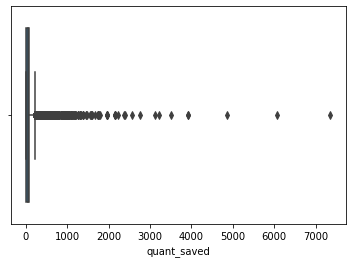

In [7]:
import seaborn as sns
sns.boxplot(data = df , x = df["quant_saved"])

In [11]:
q1 = df ["quant_saved"].quantile(0.25)
q3 = df ["quant_saved"].quantile(0.75)

iqr = q3-q1
print(f"Q1 -{q1} ")
print(f"Q3 - {q3}")
print(f"IQR-{iqr}")

lower_whisker = q1-1.5*iqr
upper_whisker = q3+1.5*iqr
print(f"lower whisker {lower_whisker}")
print(f"upper whisker - {upper_whisker} ")

new_df = df[df["quant_saved"]< upper_whisker]

Q1 -2.2840000000000003 
Q3 - 86.514
IQR-84.22999999999999
lower whisker- -124.06099999999998
upper whisker - 212.85899999999998 


In [15]:
all_savings = new_df["quant_saved"].tolist()

print(f"mean of saving-{statistics.mean(all_savings)}")  
print(f"median of saving-{statistics.median(all_savings)}")
print(f"mode of saving-{statistics.mode(all_savings)}")

print(f"Standard Deviation -{statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist = False)

fig.show()

mean of saving-46.200519389818794
median of saving-36.0475
mode of saving-0.0
Standard Deviation -50.866871917288634


In [18]:
import random
sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list) 
fig = ff.create_distplot([sampling_mean_list],["Savings(Sampling)"], show_hist = False)   
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling], y = [0,0.1], mode = "lines", name = "MEAN"))
fig.show()

In [20]:
print(f"Standard Deviation -{statistics.stdev(sampling_mean_list)}")
print(f"mean of saving-{statistics.mean(all_savings)}")
print(f"mean of sampling distribution-{mean_sampling}")



Standard Deviation -5.128686403705752
mean of saving-46.200519389818794
mean of sampling distribution-46.151859707674156


In [21]:
import numpy as np
temp_df = new_df[new_df.age != 0]
age = temp_df ["age"].tolist()
savings = temp_df["quant_saved"].tolist()
correlation = np.corrcoef(age,savings)

print(f"Correlration is -{correlation[0,1]}") 

Correlration is -0.08561544120342093
